# Numerical experiments:

### Preparations

In [1]:
import numpy as np
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt
import setup
import cg

latex_plots = True # enabling this can cause performance issues on some systems

if latex_plots:
    matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'font.size' : 14,
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

variants = ['pr_cg', 'p_cg', 'mpr_cg', 'mp_cg', 'pl_pr_cg', 'pl_p_cg', 'pl_mpr_cg', 'pl_mp_cg', 'cg']
labels = ['PR-CG', 'PR-CG (n.r.)', 'M-CG', 'M-CG (n.r.)', 'PL-PR-CG', 'PL-PR-CG (n.r.)', 'PL-M-CG', 'PL-M-CG (n.r.)', 'CG']
styles = ['b', 'b:', 'r', 'r:', 'c', 'c:', 'm', 'm:', 'k--']

def convergence_plots(A, b, x0, x_exact, preconditioner=lambda x:x, max_iter=1000):
    fig, ax = plt.subplots(1, 2, figsize=[10, 5])
    for variant, label, style in zip(variants, labels, styles):
        x, xm, rm = cg.pcg(A, b, x0, preconditioner, max_iter=max_iter, eps=0, variant=variant)
        em = xm - x_exact
        e_2norm = np.linalg.norm(em, axis=1)
        e_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, em)
        r_2norm = np.linalg.norm(rm, axis=1)
        r_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, rm)
        m = np.arange(1,len(xm)+1)
        ax[0].semilogy(m, e_2norm, style, label=label)
        ax[1].semilogy(m, r_2norm, style, label=label)
    ax[0].legend(fontsize=12)
    ax[1].legend(fontsize=12)
    ax[0].set_xlabel('iteration $m$', fontsize=16)
    ax[1].set_xlabel('iteration $m$', fontsize=16)
    ax[0].set_ylabel('$||x_m - x||_2$', fontsize=16)
    ax[1].set_ylabel('$||r_m||_2$', fontsize=16)
    ax[0].set_title('Error convergence in $||\cdot||_2$-norm', fontsize=18)
    ax[1].set_title('Residual convergence in $||\cdot||_2$-norm', fontsize=18)
    ax[0].grid()
    ax[1].grid()
    return fig, ax

### Poisson 1D

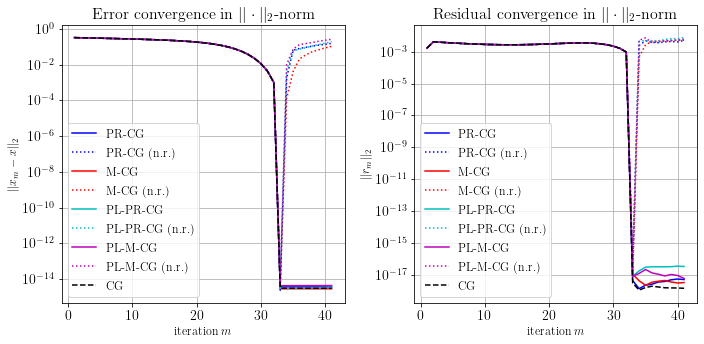

In [2]:
A, b, x_exact, x0 = setup.poisson_1d(n=64, dtype=np.float64)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=40)
plt.tight_layout()
plt.savefig('plots/poisson1d.pdf')

### Poisson 2D (no preconditioner, double precision)

cond:  79849.31871036324


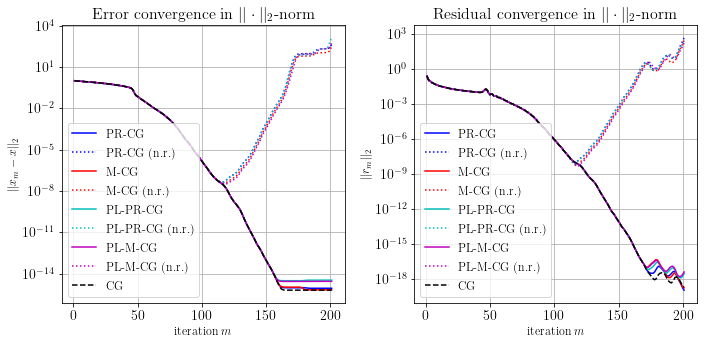

In [3]:
A, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float64, k1=1.0, k2=1.0)
print('cond: ', np.linalg.cond(A.toarray(), 'fro'))
fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=200)
#ax[0].set_ylim([None, 1e1])
#ax[1].set_ylim([None, 1e0])
plt.tight_layout()
plt.savefig('plots/poisson2d_double.pdf')

### Poisson 2D (no preconditioner, single precision)

In [4]:
A, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float32, k1=1.0, k2=1.0)
print('cond: ', np.linalg.cond(A.toarray(), 'fro'))
print(A.dtype)
fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=125)
plt.tight_layout()
plt.savefig('plots/poisson2d_single.pdf')

cond:  79849.32
float32


### Anisotropic Poisson 2D (no preconditioner)

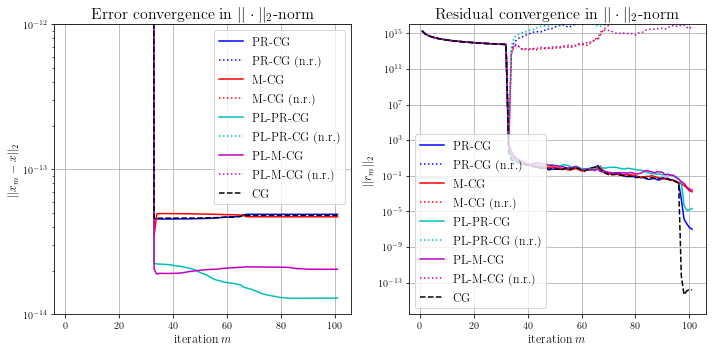

In [ ]:
A, b, x_exact, x0 = setup.poisson_2d(n=64, k1=1e16, k2=1.0)
fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=100)
ax[0].set_ylim([1e-14, 1e-12])
ax[1].set_ylim([None, 1e16])
plt.tight_layout()
plt.savefig('plots/poisson2d_aniso.pdf')

### BCSSTK03 (no preconditioner, double precision)

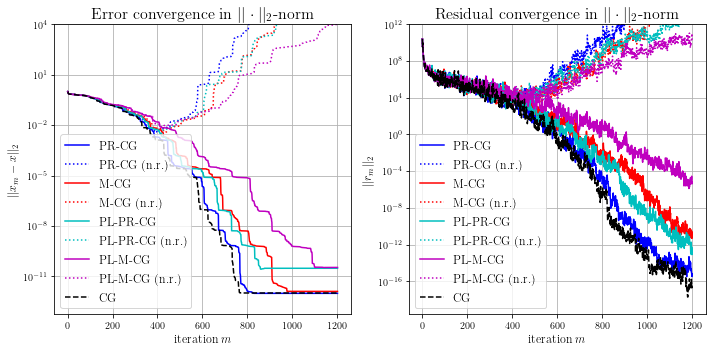

In [ ]:
A, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=1200)
ax[0].set_ylim([None, 1e4])
ax[1].set_ylim([None, 1e12])
plt.tight_layout()
plt.savefig('plots/bcsstk03.pdf')

### BCSSTK03 (Jacobi preconditioner, double precision)

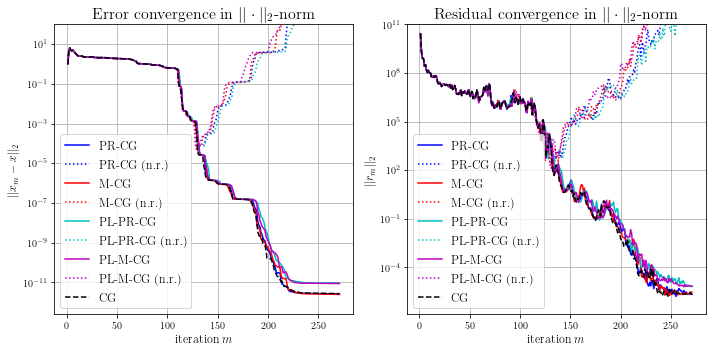

In [ ]:
A, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

# jacobi preconditioner
preconditioner = lambda x: (1/A.diagonal())*x

fig, ax = convergence_plots(A, b, x0, x_exact, preconditioner, max_iter=270)
ax[0].set_ylim([None, 1e2])
ax[1].set_ylim([None, 1e11])
plt.tight_layout()
plt.savefig('plots/bcsstk03_jac.pdf')

### Structure plot:

RuntimeError: The command
    pdflatex -interaction=nonstopmode -halt-on-error figure.tex
failed and generated the following output:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.3) (preloaded format=pdflatex.fmt)
 restricted \write18 enabled.
entering extended mode
(figure.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-04-20>
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hyperref\hyperref.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/ltxcmds\ltxcmds.sty)
 (C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pdftexcmds\pdftexcmd
s.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/infwarerr\infwarerr.
sty))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/kvsetkeys\kvsetkeys.
sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/kvdefinekeys\kvdefin
ekeys.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pdfescape\pdfescape.
sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hycolor\hycolor.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/letltxmacro\letltxmacr
o.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/auxhook\auxhook.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/kvoptions\kvoptions.st
y) (C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hyperref\pd1enc.def
)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/intcalc\intcalc.sty)

(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/etexcmds\etexcmds.st
y) (C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hyperref\puenc.def)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/url\url.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/bitset\bitset.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/bigintcalc\bigintcal
c.sty))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/base\atbegshi-ltx.sty)


Package hyperref Warning: Option `pdfpagelabels' is turned off
(hyperref)                because \thepage is undefined.

) (C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hyperref\hpdftex.def

(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/rerunfilecheck\rerunfi
lecheck.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/base\atveryend-ltx.sty
)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/uniquecounter\unique
counter.sty)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/base\minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.cfg)
)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/basiclayer\pgf.sty

(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/utilities\pgfrcs.s
ty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfuti
l-common.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfuti
l-common-lists.tex))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfuti
l-latex.def)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfrcs
.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf\pgf.revision.tex
)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/basiclayer\pgfcore
.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics\graphicx.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics\graphics.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics\trig.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics-cfg\graphics.
cfg)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics-def\pdftex.de
f)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/systemlayer\pgfsys
.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgfs
ys.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfkey
s.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/utilities\pgfkey
sfiltered.code.tex))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgf.
cfg)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgfs
ys-pdftex.def
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgfs
ys-common-pdf.def)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgfs
yssoftpath.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/systemlayer\pgfs
ysprotocol.code.tex))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/xcolor\xcolor.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/graphics-cfg\color.cfg
))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
re.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmath.cod
e.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathcalc
.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathutil
.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathpars
er.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.basic.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.trigonometric.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.random.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.comparison.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.base.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.round.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.misc.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfunc
tions.integerarithmetics.code.tex)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfmathfloa
t.code.tex))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/math\pgfint.code
.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
repoints.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
repathconstruct.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
repathusage.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
rescopes.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
regraphicstate.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
retransformations.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
requick.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
reobjects.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
repathprocessing.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
rearrows.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
reshade.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
reimage.code.tex
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
reexternal.code.tex))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
relayers.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
retransparency.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
repatterns.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/basiclayer\pgfco
rerdf.code.tex)))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/modules\pgfmodul
eshapes.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/pgf/modules\pgfmodul
eplot.code.tex)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/compatibility\pgfc
omp-version-0-65.sty)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/pgf/compatibility\pgfc
omp-version-1-18.sty))
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend-pd
ftex.def)
No file figure.aux.
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/hyperref\nameref.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/refcount\refcount.sty)

(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/generic/gettitlestring\getti
tlestring.sty))
*geometry* driver: auto-detecting
*geometry* detected driver: pdftex

(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/context/base/mkii\supp-pdf.m
kii
[Loading MPS to PDF converter (version 2006.09.02).]
)
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/epstopdf-pkg\epstopdf-
base.sty
(C:\Users\Julius\AppData\Local\Programs\MiKTeX\tex/latex/00miktex\epstopdf-sys.
cfg)) (figure.pgf
Runaway text?
q -0.04942 -0.04942 m 0.04942 -0.04942 l 0.04942 0.04942 l 
! TeX capacity exceeded, sorry [main memory size=3000000].
<argument> ...04942 -0.04942 l 0.04942 0.04942 l -
                                                  0.04942 0.04942 l h B Q 
l.75536 \pgfsys@useobject{currentmarker}{}
                                          %
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on figure.log.

and the following error:


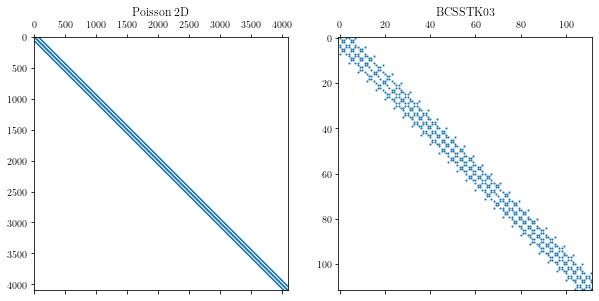

In [ ]:
A1, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float64)
A2, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

fig, ax = plt.subplots(1, 2, figsize=[10, 5])
ax[0].spy(A1, markersize=0.1)
ax[0].set_title('Poisson 2D')
ax[1].spy(A2, markersize=1)
ax[1].set_title('BCSSTK03')
plt.savefig('plots/structure.pdf')